In [36]:
import pandas as pd
pd.set_option('max_colwidth', 100)
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools
import scipy.stats as st

In [ ]:
# Data - ABCD
# reporter - child
# Hypothesis - Hyp2a (depressed vs another form of psychopathology (ADHD/anxiety))

In [37]:
path_to_ksads = '/data/ABCD_MBDU/release3-tabulated-data/abcd_ksad501.txt'
path_to_cbcl = '/data/ABCD_MBDU/release3-tabulated-data/abcd_cbcls01.txt'
Hypothesis = '2a' # no need to specify target AUCROC manuall because this is conditioned later

# Import data

## ksads

In [38]:
ksads_data = pd.read_csv(path_to_ksads, sep='\t', header=0, low_memory=False)
ksads_data.head()

,collection_id,abcd_ksad501_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,sex,eventname,ksads_import_id_t,...,ksads_10_47_t,ksads_11_51_t,ksads_12_65_t,ksads_13_75_t,ksads_14_90_t,ksads_25_33_t,ksads_timestamp_t,ksads_duration_t,collection_title,study_cohort_name
0,collection_id,abcd_ksad501_id,dataset_id,The NDAR Global Unique Identifier (GUID) for research subject,Subject ID how it's defined in lab/project,Date on which the interview/genetic test/sampling/imaging/biospecimen was completed. MM/DD/YYYY,Age in months at the time of the interview/test/sampling/imaging.,Sex of the subject,The event name for which the data was collected,Unique ID provided by KSADS for dataset,...,"Symptom - Worrying has lasted at least 6 months, Present","Symptom - Compulsions, Past","Symptom - Encopresis not due to medical illness, Past","Symptom - Binge Eating, Past","Symptom - Impulsivity for more than one school year, Past","Symptom - Failure to speak in social situations, Past",Starting timestamp for the survey,Time duration for the survey,collection_title,study_cohort_name
1,2573,143639,34614,NDAR_INV00BD7VDC,NDAR_INV00BD7VDC,04/24/2019,123,M,1_year_follow_up_y_arm_1,NDAR_INV00BD7VDC_1yearfollowupyarm1_01,...,555,555,555,555,555,555,04-24-2019 05:46,1,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
2,2573,143640,34614,NDAR_INV00BD7VDC,NDAR_INV00BD7VDC,06/12/2018,112,M,baseline_year_1_arm_1,NDAR_INV00BD7VDC_baselineyear1arm1_01,...,0,555,555,555,555,555,06-12-2018 11:17,11,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
3,2573,143643,34614,NDAR_INV00CY2MDM,NDAR_INV00CY2MDM,08/22/2017,130,M,baseline_year_1_arm_1,NDAR_INV00CY2MDM_baselineyear1arm1_01,...,0,555,555,555,555,555,08-22-2017 11:42,5,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
4,2573,143649,34614,NDAR_INV00LH735Y,NDAR_INV00LH735Y,01/30/2019,121,M,1_year_follow_up_y_arm_1,NDAR_INV00LH735Y_1yearfollowupyarm1_01,...,555,555,555,555,555,555,01-30-2019 05:40,1,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release


In [39]:
long_names = ksads_data.loc[0].to_dict()
ksads_data = ksads_data.drop(0)

ksads_data_bsl = ksads_data.loc[ksads_data.eventname == 'baseline_year_1_arm_1'].copy()
ksads_data_bsl.head()

,collection_id,abcd_ksad501_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,sex,eventname,ksads_import_id_t,...,ksads_10_47_t,ksads_11_51_t,ksads_12_65_t,ksads_13_75_t,ksads_14_90_t,ksads_25_33_t,ksads_timestamp_t,ksads_duration_t,collection_title,study_cohort_name
2,2573,143640,34614,NDAR_INV00BD7VDC,NDAR_INV00BD7VDC,06/12/2018,112,M,baseline_year_1_arm_1,NDAR_INV00BD7VDC_baselineyear1arm1_01,...,0,555,555,555,555,555,06-12-2018 11:17,11,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
3,2573,143643,34614,NDAR_INV00CY2MDM,NDAR_INV00CY2MDM,08/22/2017,130,M,baseline_year_1_arm_1,NDAR_INV00CY2MDM_baselineyear1arm1_01,...,0,555,555,555,555,555,08-22-2017 11:42,5,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
6,2573,143656,34614,NDAR_INV00NPMHND,NDAR_INV00NPMHND,03/21/2017,118,F,baseline_year_1_arm_1,555,...,0,555,555,555,555,555,03-21-2017 06:13,9,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
7,2573,143658,34614,NDAR_INV00R4TXET,NDAR_INV00R4TXET,04/10/2018,114,F,baseline_year_1_arm_1,NDAR_INV00R4TXET_baselineyear1arm1_01,...,0,555,555,555,555,555,04-10-2018 03:14,6,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
8,2573,143662,34614,NDAR_INV00UMK5VC,NDAR_INV00UMK5VC,09/12/2018,119,F,baseline_year_1_arm_1,NDAR_INV00UMK5VC_baselineyear1arm1_01,...,0,555,555,555,555,555,09-12-2018 01:14,26,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release


### Only leave columns with depression, adhd and anxiety

In [40]:
# column names - depression
# note - not the ones Dylan made
# only MDD, current and in partial remission
# Persistent Depressive Disorder (Dysthymia), current and in partial remission
# Unspecified Depressive Disorder, Current

depression_column_list = [f'ksads_1_{x}_t' for x in [840, 841, 843, 844, 846]]

# column names - adhd
adhd_column_list = ['ksads_14_856_t', 'ksads_14_855_t', 'ksads_14_853_t']

# column names - anxiety
anxiety_column_list = [ 'ksads_5_906_t',  'ksads_5_857_t', 'ksads_6_908_t',  'ksads_7_861_t',  'ksads_7_909_t',  'ksads_8_863_t',  'ksads_8_911_t', 'ksads_10_913_t', 'ksads_10_869_t', 'ksads_9_867_t']
# all_disorders
col_list = ['src_subject_id']
col_list += depression_column_list
col_list += adhd_column_list
col_list += anxiety_column_list

col_list

anxiety_or_adhd_column_list = anxiety_column_list + adhd_column_list

In [42]:
ksads_bsl_id_depanxadhd = ksads_data_bsl.loc[:, col_list]
# use src_subject_id as index
ksads_bsl_id_depanxadhd = ksads_bsl_id_depanxadhd.set_index('src_subject_id')
ksads_bsl_id_depanxadhd.head()

,ksads_1_840_t,ksads_1_841_t,ksads_1_843_t,ksads_1_844_t,ksads_1_846_t,ksads_14_856_t,ksads_14_855_t,ksads_14_853_t,ksads_5_906_t,ksads_5_857_t,ksads_6_908_t,ksads_7_861_t,ksads_7_909_t,ksads_8_863_t,ksads_8_911_t,ksads_10_913_t,ksads_10_869_t,ksads_9_867_t
src_subject_id,,,,,,,,,,,,,,,,,,
NDAR_INV00BD7VDC,0,0,0,0,0,555,555,555,555,555,555,555,555,0,0,0,0,555
NDAR_INV00CY2MDM,0,0,0,0,0,555,555,555,555,555,555,555,555,0,0,0,0,555
NDAR_INV00NPMHND,0,0,0,0,0,555,555,555,555,555,555,555,555,0,0,0,0,555
NDAR_INV00R4TXET,0,0,0,0,0,555,555,555,555,555,555,555,555,0,0,0,0,555
NDAR_INV00UMK5VC,0,0,0,0,0,555,555,555,555,555,555,555,555,0,0,0,0,555


In [43]:
for depression_diag in depression_column_list:
    print(ksads_bsl_id_depanxadhd[depression_diag].value_counts())

0      11739
555       73
1         66
Name: ksads_1_840_t, dtype: int64
0      11778
555       73
1         27
Name: ksads_1_841_t, dtype: int64
0      11805
555       73
Name: ksads_1_843_t, dtype: int64
0      11805
555       73
Name: ksads_1_844_t, dtype: int64
0      11777
555       73
1         28
Name: ksads_1_846_t, dtype: int64


In [44]:
for anxiety_diag in anxiety_column_list:
    print('\n')
    print(long_names[anxiety_diag])
    print(ksads_bsl_id_depanxadhd[anxiety_diag].value_counts())



Diagnosis - Other Specified Anxiety Disorder (Panic Disorder, impairment, does not meet full criteria), F41.8
555    11878
Name: ksads_5_906_t, dtype: int64


Diagnosis - Panic Disorder (F41.0) PRESENT
555    11878
Name: ksads_5_857_t, dtype: int64


Diagnosis - Other Specified Anxiety Disorder (Agoraphobia, impairment, does not meet full criteria), F41.8
555    11878
Name: ksads_6_908_t, dtype: int64


Diagnosis - Separation Anxiety Disorder (F93.00) PRESENT
555    11878
Name: ksads_7_861_t, dtype: int64


Diagnosis - Other Specified Anxiety Disorder (Separation Anxiety Disorder, impairment, does not meet full criteria), F41.8
555    11878
Name: ksads_7_909_t, dtype: int64


Diagnosis - Social Anxiety Disorder (F40.10) PRESENT
0      11757
555       73
1         48
Name: ksads_8_863_t, dtype: int64


Diagnosis - Other Specified Anxiety Disorder (Social Anxiety Disorder, impairment, does not meet minimum duration) F41.8
0      11805
555       73
Name: ksads_8_911_t, dtype: int64


Di

In [45]:
for anxiety_diag in anxiety_column_list:
    print('\n')
    print(ksads_bsl_id_depanxadhd[anxiety_diag].value_counts())



555    11878
Name: ksads_5_906_t, dtype: int64


555    11878
Name: ksads_5_857_t, dtype: int64


555    11878
Name: ksads_6_908_t, dtype: int64


555    11878
Name: ksads_7_861_t, dtype: int64


555    11878
Name: ksads_7_909_t, dtype: int64


0      11757
555       73
1         48
Name: ksads_8_863_t, dtype: int64


0      11805
555       73
Name: ksads_8_911_t, dtype: int64


0      11784
555       73
1         21
Name: ksads_10_913_t, dtype: int64


0      11770
555       73
1         35
Name: ksads_10_869_t, dtype: int64


555    11878
Name: ksads_9_867_t, dtype: int64


In [46]:
for adhd_diag in adhd_column_list:
    print(ksads_bsl_id_depanxadhd[adhd_diag].value_counts())

555    11878
Name: ksads_14_856_t, dtype: int64
555    11878
Name: ksads_14_855_t, dtype: int64
555    11878
Name: ksads_14_853_t, dtype: int64


In [47]:
# Removing missing data
# missing data (nan) is coded as 555 or 888. 
# We have some columns which are missing entirely. I am dropping them.

# drop nan columns:
nan_columns = ['ksads_14_856_t', 'ksads_14_855_t', 'ksads_14_853_t', 'ksads_9_867_t', 'ksads_5_906_t', 'ksads_5_857_t',  'ksads_6_908_t', 'ksads_7_861_t', 'ksads_7_909_t']
ksads_bsl_id_depanxadhd = ksads_bsl_id_depanxadhd.drop(columns = nan_columns)



In [50]:
ksads_bsl_id_depanxadhd.head()

,ksads_1_840_t,ksads_1_841_t,ksads_1_843_t,ksads_1_844_t,ksads_1_846_t,ksads_8_863_t,ksads_8_911_t,ksads_10_913_t,ksads_10_869_t,any_depression
src_subject_id,,,,,,,,,,
NDAR_INV00BD7VDC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
NDAR_INV00CY2MDM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
NDAR_INV00NPMHND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
NDAR_INV00R4TXET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
NDAR_INV00UMK5VC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [51]:
# only keeping non-nan columns 

adhd_column_list = []
anxiety_column_list = ['ksads_8_863_t', 'ksads_8_911_t', 'ksads_10_913_t', 'ksads_10_869_t']

col_list = []
col_list += depression_column_list
col_list += adhd_column_list
col_list += anxiety_column_list

anxiety_or_adhd_column_list = anxiety_column_list + adhd_column_list

ksads_bsl_id_depanxadhd = ksads_bsl_id_depanxadhd.loc[:, col_list]

In [53]:
ksads_bsl_id_depanxadhd.head()

,ksads_1_840_t,ksads_1_841_t,ksads_1_843_t,ksads_1_844_t,ksads_1_846_t,ksads_8_863_t,ksads_8_911_t,ksads_10_913_t,ksads_10_869_t
src_subject_id,,,,,,,,,
NDAR_INV00BD7VDC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NDAR_INV00CY2MDM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NDAR_INV00NPMHND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NDAR_INV00R4TXET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NDAR_INV00UMK5VC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
ksads_bsl_id_depanxadhd.applymap(pd.api.types.is_float).sum()

ksads_1_840_t     11878
ksads_1_841_t     11878
ksads_1_843_t     11878
ksads_1_844_t     11878
ksads_1_846_t     11878
ksads_8_863_t     11878
ksads_8_911_t     11878
ksads_10_913_t    11878
ksads_10_869_t    11878
dtype: int64

In [59]:
ksads_bsl_id_depanxadhd = ksads_bsl_id_depanxadhd.astype(float)

In [60]:
# Missing data is coded as 555 or 888
# Basically, ksads data is binary, so everything that's >1 should not be there
# Here we locate the missing data and remove it 

ksads_bsl_id_depanxadhd[ksads_bsl_id_depanxadhd > 1] = np.nan
ksads_bsl_id_depanxadhd['any_depression'] = (ksads_bsl_id_depanxadhd.loc[:, depression_column_list] > 0).sum(1) > 0
ksads_bsl_id_depanxadhd['anxadhd_null'] = ksads_bsl_id_depanxadhd.loc[:, adhd_column_list + anxiety_column_list].isnull().sum(1) > 0
ksads_bsl_id_depanxadhd['good'] = ksads_bsl_id_depanxadhd.any_depression | (~ksads_bsl_id_depanxadhd.anxadhd_null)

bad_ids = ksads_bsl_id_depanxadhd.loc[~ksads_bsl_id_depanxadhd.good].index
good_ids = ksads_bsl_id_depanxadhd.loc[ksads_bsl_id_depanxadhd.good].index

# only in this specific situation, since we don't care about comorbidities of depression for this hypothesis, we'll set nans to 0
# ksads_bsl_id_depanxadhd.loc[ksads_bsl_id_depanxadhd.good & ksads_bsl_id_depanxadhd.any_depression & ksads_bsl_id_depanxadhd.anxadhd_null, 'ksads_6_908_p'] = 0

In [61]:
check1 = (ksads_bsl_id_depanxadhd.loc[:, depression_column_list].sum(1) > 0).astype(int)
check1.sum()

120

In [64]:
ksads_dat = (ksads_bsl_id_depanxadhd.loc[good_ids, depression_column_list].sum(1) > 0).astype(int)
ksads_dat.head()
type(ksads_dat)
print(ksads_dat.sum())
ksads_dat.to_frame()
ksads_dat.value_counts()

120


0    11685
1      120
dtype: int64

In [65]:
ksads_dat = pd.DataFrame(ksads_dat).rename(columns={0:'ksads_DEPRESSION'})
ksads_dat['ksads_ANXIETY'] = (ksads_bsl_id_depanxadhd.loc[good_ids, anxiety_column_list].sum(1) > 0).astype(int)
ksads_dat['ksads_ADHD'] = (ksads_bsl_id_depanxadhd.loc[good_ids, adhd_column_list].sum(1) > 0).astype(int)
ksads_dat['ksads_ADHD_OR_ANXIETY'] = (ksads_bsl_id_depanxadhd.loc[good_ids, anxiety_or_adhd_column_list].sum(1) > 0).astype(int)

In [66]:
ksads_dat.head()
ksads_dat['ksads_DEPRESSION'].value_counts()

0    11685
1      120
Name: ksads_DEPRESSION, dtype: int64

In [69]:
DEPyes_ANXADHDno = []
DEPno_ANXADHDyes = []

for index, row in ksads_dat.iterrows():
    if row['ksads_DEPRESSION'] == 1 and row['ksads_ADHD_OR_ANXIETY'] == 0:
        DEPyes_ANXADHDno.append(1)
    else:
        DEPyes_ANXADHDno.append(0)
        
    if row['ksads_DEPRESSION'] == 0 and row['ksads_ADHD_OR_ANXIETY'] == 1:
        DEPno_ANXADHDyes.append(1)
    else:
        DEPno_ANXADHDyes.append(0)

print(sum(DEPyes_ANXADHDno))
print(sum(DEPno_ANXADHDyes))

ksads_dat['ksads_DEPyes_ANXADHDno'] = DEPyes_ANXADHDno
ksads_dat['ksads_DEPno_ANXADHDyes'] = DEPno_ANXADHDyes
print(ksads_dat.head())

106
78
                  ksads_DEPRESSION  ksads_ANXIETY  ksads_ADHD  \
src_subject_id                                                  
NDAR_INV00BD7VDC                 0              0           0   
NDAR_INV00CY2MDM                 0              0           0   
NDAR_INV00NPMHND                 0              0           0   
NDAR_INV00R4TXET                 0              0           0   
NDAR_INV00UMK5VC                 0              0           0   

                  ksads_ADHD_OR_ANXIETY  ksads_DEPyes_ANXADHDno  \
src_subject_id                                                    
NDAR_INV00BD7VDC                      0                       0   
NDAR_INV00CY2MDM                      0                       0   
NDAR_INV00NPMHND                      0                       0   
NDAR_INV00R4TXET                      0                       0   
NDAR_INV00UMK5VC                      0                       0   

                  ksads_DEPno_ANXADHDyes  
src_subject_id          

### end of creating the clean ksads dataframe

## Load cbcl

In [70]:
cbcl_data = pd.read_csv(path_to_cbcl, sep='\t', header=0, low_memory=False)
cbcl_data.head()

,collection_id,abcd_cbcls01_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,sex,eventname,cbcl_scr_syn_anxdep_r,...,cbcl_scr_07_ocd_r,cbcl_scr_07_ocd_t,cbcl_scr_07_ocd_m,cbcl_scr_07_ocd_nm,cbcl_scr_07_stress_r,cbcl_scr_07_stress_t,cbcl_scr_07_stress_m,cbcl_scr_07_stress_nm,collection_title,study_cohort_name
0,collection_id,abcd_cbcls01_id,dataset_id,The NDAR Global Unique Identifier (GUID) for research subject,Subject ID how it's defined in lab/project,Date on which the interview/genetic test/sampling/imaging/biospecimen was completed. MM/DD/YYYY,Age in months at the time of the interview/test/sampling/imaging.,Sex of the subject,The event name for which the data was collected,AnxDep CBCL Syndrome Scale (raw score),...,Obsessive-Compulsive Problems (OCD) CBCL Scale2007 Scale (raw score),Obsessive-Compulsive Problems (OCD) CBCL Scale2007 Scale (t-score),Obsessive-Compulsive Problems (OCD) CBCL Scale2007 Scale (missing values),Obsessive-Compulsive Problems (OCD) CBCL Scale2007 Scale (number of missing values),Stress CBCL Scale2007 Scale (raw score),Stress CBCL Scale2007 Scale (t-score),Stress CBCL Scale2007 Scale (missing values),Stress CBCL Scale2007 Scale (number of missing values),collection_title,study_cohort_name
1,2573,76906,34967,NDAR_INV003RTV85,NDAR_INV003RTV85,10/01/2018,131,F,baseline_year_1_arm_1,0,...,0,50,NaN,0,0,50,NaN,0,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
2,2573,76922,34967,NDAR_INV00LH735Y,NDAR_INV00LH735Y,01/29/2018,109,M,baseline_year_1_arm_1,0,...,0,50,NaN,0,1,50,NaN,0,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
3,2573,76930,34967,NDAR_INV00U4FTRU,NDAR_INV00U4FTRU,05/11/2019,141,F,1_year_follow_up_y_arm_1,10,...,8,76,NaN,0,18,81,NaN,0,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
4,2573,76932,34967,NDAR_INV00UMK5VC,NDAR_INV00UMK5VC,09/25/2019,132,F,1_year_follow_up_y_arm_1,1,...,0,50,NaN,0,4,54,NaN,0,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release


In [71]:
cbcl_data = cbcl_data.drop(0)

cbcl_data_bsl = cbcl_data.loc[cbcl_data.eventname == 'baseline_year_1_arm_1'].copy()
cbcl_data_bsl.head()

,collection_id,abcd_cbcls01_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,sex,eventname,cbcl_scr_syn_anxdep_r,...,cbcl_scr_07_ocd_r,cbcl_scr_07_ocd_t,cbcl_scr_07_ocd_m,cbcl_scr_07_ocd_nm,cbcl_scr_07_stress_r,cbcl_scr_07_stress_t,cbcl_scr_07_stress_m,cbcl_scr_07_stress_nm,collection_title,study_cohort_name
1,2573,76906,34967,NDAR_INV003RTV85,NDAR_INV003RTV85,10/01/2018,131,F,baseline_year_1_arm_1,0,...,0,50,NaN,0,0,50,NaN,0,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
2,2573,76922,34967,NDAR_INV00LH735Y,NDAR_INV00LH735Y,01/29/2018,109,M,baseline_year_1_arm_1,0,...,0,50,NaN,0,1,50,NaN,0,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
6,2573,76960,34967,NDAR_INV01NAYMZH,NDAR_INV01NAYMZH,08/09/2017,129,M,baseline_year_1_arm_1,0,...,1,51,NaN,0,2,50,NaN,0,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
10,2573,77005,34967,NDAR_INV030W95VP,NDAR_INV030W95VP,03/11/2017,128,F,baseline_year_1_arm_1,1,...,0,50,NaN,0,1,50,NaN,0,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
13,2573,77023,34967,NDAR_INV03NW0RKL,NDAR_INV03NW0RKL,04/17/2017,119,F,baseline_year_1_arm_1,0,...,0,50,NaN,0,1,50,NaN,0,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release


### cbcl - only leave columns with name id and DSM depression diagnosis

In [72]:
col_list_cbcl = ['src_subject_id', 'cbcl_scr_dsm5_depress_t']
cbcl_bsl_id_dep = cbcl_data_bsl.loc[:, col_list_cbcl]
cbcl_bsl_id_dep = cbcl_bsl_id_dep.set_index('src_subject_id')
cbcl_bsl_id_dep.head(20)

,cbcl_scr_dsm5_depress_t
src_subject_id,
NDAR_INV003RTV85,50
NDAR_INV00LH735Y,50
NDAR_INV01NAYMZH,50
NDAR_INV030W95VP,50
NDAR_INV03NW0RKL,50
NDAR_INV04YC4RXD,50
NDAR_INV05CA3VX5,50
NDAR_INV07UK1DPH,60
NDAR_INV08894886,73


# Merging the ksads and the cbcl dataframes
##### ksads_bsl_id_depanxadhd
##### cbcl_bsl_id_dep

In [77]:
data_ksads_cbcl = ksads_dat.merge(cbcl_bsl_id_dep, how = 'left', left_index = True, right_index = True, indicator = True)
assert len(data_ksads_cbcl.query('_merge != "both"')) == 0
data_ksads_cbcl = ksads_dat.merge(cbcl_bsl_id_dep, how = 'left', left_index = True, right_index = True)

data_ksads_cbcl = data_ksads_cbcl.loc[data_ksads_cbcl.cbcl_scr_dsm5_depress_t.notnull()].copy()
data_ksads_cbcl['cbcl_scr_dsm5_depress_t'] = data_ksads_cbcl.cbcl_scr_dsm5_depress_t.astype(int)
data_ksads_cbcl.head()

,ksads_DEPRESSION,ksads_ANXIETY,ksads_ADHD,ksads_ADHD_OR_ANXIETY,ksads_DEPyes_ANXADHDno,ksads_DEPno_ANXADHDyes,cbcl_scr_dsm5_depress_t
src_subject_id,,,,,,,
NDAR_INV00BD7VDC,0,0,0,0,0,0,52
NDAR_INV00CY2MDM,0,0,0,0,0,0,52
NDAR_INV00NPMHND,0,0,0,0,0,0,73
NDAR_INV00R4TXET,0,0,0,0,0,0,52
NDAR_INV00UMK5VC,0,0,0,0,0,0,50


# START ANALYSIS

In [1]:
# Creating the data sample to analyze, with data size and positive/negative case ratio we want

## Split into positive and negative diagnosis.

--> For Hypothesis 2a, <br>
------> POS = all depression (n=54) <br>
------> NEG = ADHD/ANXIETY yes, DEPRESSION no (*Limit the negative sample*)<br>
<br>
--> For Hypothesis 2b, <br>
------> POS = DEPRESSION yes, ADHD/ANXIETY no (n=54) <br>
------> NEG = ADHD/ANXIETY yes, DEPRESSION no (*Limit the negative sample*)<br>

In [78]:
if Hypothesis == '2a':
    is_pos = data_ksads_cbcl['ksads_DEPRESSION']==1
    is_neg = (data_ksads_cbcl['ksads_DEPRESSION']==0) & (data_ksads_cbcl['ksads_ADHD_OR_ANXIETY']==1) & (data_ksads_cbcl['cbcl_scr_dsm5_depress_t'].notnull() )
elif Hypothesis == '2b':
    is_pos = data_ksads_cbcl['ksads_DEPyes_ANXADHDno']==1
    is_neg = (data_ksads_cbcl['ksads_DEPno_ANXADHDyes']==1) & (data_ksads_cbcl['cbcl_scr_dsm5_depress_t'].notnull() )

else: 
    print("Wrong hypothesis")
        
pos_ksads_all = data_ksads_cbcl[is_pos]
neg_ksads_all = data_ksads_cbcl[is_neg]


print(pos_ksads_all.head())
print(pos_ksads_all.shape)
print(neg_ksads_all.shape)

                  ksads_DEPRESSION  ksads_ANXIETY  ksads_ADHD  \
src_subject_id                                                  
NDAR_INV0G42TBW1                 1              0           0   
NDAR_INV14PHMUNU                 1              0           0   
NDAR_INV2LTBNJKC                 1              0           0   
NDAR_INV4Z4RC8PH                 1              0           0   
NDAR_INV59MJGL9R                 1              0           0   

                  ksads_ADHD_OR_ANXIETY  ksads_DEPyes_ANXADHDno  \
src_subject_id                                                    
NDAR_INV0G42TBW1                      0                       1   
NDAR_INV14PHMUNU                      0                       1   
NDAR_INV2LTBNJKC                      0                       1   
NDAR_INV4Z4RC8PH                      0                       1   
NDAR_INV59MJGL9R                      0                       1   

                  ksads_DEPno_ANXADHDyes  cbcl_scr_dsm5_depress_t  
src_su

## We can't choose the neg_ksads subsample. We just use the whole sample: neg and pos
This will be an awkward way to do it, first splitting then joining, that isn't necessary. Still, I am reusing my old code, and this way it is faster.

In [79]:
'''num_pos = pos_ksads_all.shape[0]
size_subsample = num_pos*10-num_pos
neg_ksads_subsample = neg_ksads_all.sample(n = size_subsample)
print(neg_ksads_subsample.head())
neg_ksads_subsample.shape'''

'num_pos = pos_ksads_all.shape[0]\nsize_subsample = num_pos*10-num_pos\nneg_ksads_subsample = neg_ksads_all.sample(n = size_subsample)\nprint(neg_ksads_subsample.head())\nneg_ksads_subsample.shape'

## Mix all positive cases and the subsample of negative cases. Then shuffle. 


In [80]:
frames = [pos_ksads_all, neg_ksads_all]
my_subsample = pd.concat(frames)
my_subsample = my_subsample.sample(frac = 1)
print(my_subsample.head())
print(my_subsample.shape)

                  ksads_DEPRESSION  ksads_ANXIETY  ksads_ADHD  \
src_subject_id                                                  
NDAR_INVFPG0VGT4                 1              0           0   
NDAR_INVWGYVBK6Y                 1              0           0   
NDAR_INV0MCARYLD                 1              1           0   
NDAR_INVCP854T1A                 1              0           0   
NDAR_INVFFK2LWBF                 0              1           0   

                  ksads_ADHD_OR_ANXIETY  ksads_DEPyes_ANXADHDno  \
src_subject_id                                                    
NDAR_INVFPG0VGT4                      0                       1   
NDAR_INVWGYVBK6Y                      0                       1   
NDAR_INV0MCARYLD                      1                       0   
NDAR_INVCP854T1A                      0                       1   
NDAR_INVFFK2LWBF                      1                       0   

                  ksads_DEPno_ANXADHDyes  cbcl_scr_dsm5_depress_t  
src_su

In [81]:
my_subsample.isnull().sum()

ksads_DEPRESSION           0
ksads_ANXIETY              0
ksads_ADHD                 0
ksads_ADHD_OR_ANXIETY      0
ksads_DEPyes_ANXADHDno     0
ksads_DEPno_ANXADHDyes     0
cbcl_scr_dsm5_depress_t    0
dtype: int64

# AUCROC

In [82]:
y_true = my_subsample['ksads_DEPRESSION'].tolist() # called y_test in the example
y_cbcl = my_subsample['cbcl_scr_dsm5_depress_t'].tolist() # called y_score in the example
print(y_true[:20])
print(y_cbcl[:20])

[1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0]
[73, 56, 50, 76, 75, 72, 56, 56, 76, 56, 52, 50, 56, 56, 56, 65, 50, 50, 56, 68]


In [83]:
print(len(y_true))
print(len(y_cbcl))

198
198


In [86]:
roc_auc_score(y_true, y_cbcl)
# Note that we don't report this AUCROC in the paper. Instead, we do bootstrapping, calculate AUCROC at each bootstrap iteration, and take the mean of those results.


0.478258547008547

## Plot

In [87]:
my_subsample.head()

,ksads_DEPRESSION,ksads_ANXIETY,ksads_ADHD,ksads_ADHD_OR_ANXIETY,ksads_DEPyes_ANXADHDno,ksads_DEPno_ANXADHDyes,cbcl_scr_dsm5_depress_t
src_subject_id,,,,,,,
NDAR_INVFPG0VGT4,1,0,0,0,1,0,73
NDAR_INVWGYVBK6Y,1,0,0,0,1,0,56
NDAR_INV0MCARYLD,1,1,0,1,0,0,50
NDAR_INVCP854T1A,1,0,0,0,1,0,76
NDAR_INVFFK2LWBF,0,1,0,1,0,1,75


In [88]:
y_true_df = my_subsample['ksads_DEPRESSION']
y_cbcl_df = my_subsample['cbcl_scr_dsm5_depress_t']
sample_auc_score = roc_auc_score(y_true, y_cbcl)

In [89]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_true_df, y_cbcl_df)
roc_auc = auc(fpr, tpr)
roc_auc

0.478258547008547

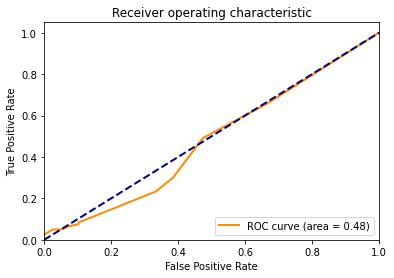

In [90]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Saving

In [ ]:
# We save this data to plot all the ROCs of the same dataset in one figure, for the paper.

In [116]:
with open('../data_for_plotting/ABCDchild_Hyp2a_y_true_df.npy', 'wb') as f:
    np.save(f, y_true_df)
with open('../data_for_plotting/ABCDchild_Hyp2a_y_cbcl_df.npy', 'wb') as f:
    np.save(f, y_cbcl_df)

In [117]:
# Checking
with open('../data_for_plotting/ABCDchild_Hyp2a_y_true_df.npy', 'rb') as f:
    my_true_df = np.load(f)
with open('../data_for_plotting/ABCDchild_Hyp2a_y_cbcl_df.npy', 'rb') as f:
    my_cbcl_df = np.load(f)

In [118]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(my_true_df, my_cbcl_df)
roc_auc = auc(fpr, tpr)
roc_auc

0.478258547008547

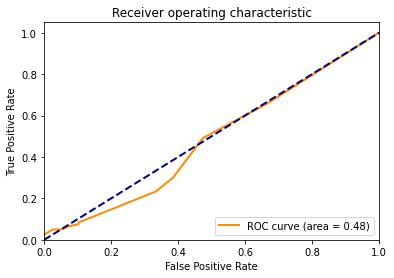

In [119]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

## Bootstrapping

In [95]:
def gen_auc_boots(scores, truth, nboots=100, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    boot_res = []
    for pp in range(nboots):
        boot_ind = rng.choice(range(len(truth)), size=truth.size, replace=True)
        boot_truth = truth[boot_ind]
        boot_score = scores[boot_ind]
        boot_res.append(roc_auc_score(boot_truth, boot_score))
    return np.array(boot_res)

In [96]:
rng = np.random.default_rng()

if Hypothesis == '2a':
    target_auc = 0.8 # because we defined it this way. Change for Hyp 2b.
elif Hypothesis == '2b':
    target_auc = 0.7

boots = gen_auc_boots(y_cbcl_df, y_true_df, nboots=1000, rng=rng)
boots = np.hstack([boots, np.array([sample_auc_score])])
p = (boots >= target_auc).mean()

In [97]:
boots

array([0.42535744, 0.42169421, 0.49711538, ..., 0.5100274 , 0.48186363,
       0.47825855])

In [98]:
print (min(boots))

0.34115961199294537


# RESULTS

In [100]:
p_onesided = (boots >= target_auc).mean()
p_onesided

0.0

In [101]:
p_twosided1 = (boots > target_auc).mean()
p_twosided2 = (boots < target_auc).mean()
p_twosided = min(p_twosided1, p_twosided2)*2
p_twosided

0.0

In [ ]:
print(np.quantile(boots, .025))
print(np.quantile(boots, .975))
boots_mean_AUCROC = np.mean(boots)
print(boots_mean_AUCROC, '(', np.quantile(boots, .025), np.quantile(boots, .975), ')')

# --- Confusion matrices for optimal thresholds ---

In [109]:
conf_fpr, conf_tpr, conf_thresh = roc_curve(y_true, y_cbcl)
conf_thresh

array([90, 89, 78, 76, 75, 73, 72, 70, 68, 66, 65, 63, 60, 56, 52, 50])

In [110]:
roc_auc = auc(conf_fpr, conf_tpr)
roc_auc

0.478258547008547

In [111]:
def predict_y(cbcl, theshold):
    y_score = []
    for item in y_cbcl:
        if item >= threshold:
            y_score.append(1)
        else:
            y_score.append(0)
    return y_score

In [112]:
# Create a dataframe for all data for thresholds and associated fpr, tpr, tp, tn, fp, fn

# and also euclidian distance
# --> tpr - y axis 
# --> fpr - x axis 
# We want to calculate an Euclidian distance to (0,1) for each point on the ROC curve and pick the point where that is minimized. 

## dist = sqrt((x2 - x1)^2 + (y2 - y1)^2) 
## dist = sqrt(square(x2 - x1) + square(y2 - y1)) 

# I will create the df from a list of lists

# first initiate the lists

all_roc_auc = []
all_fpr = []
all_tpr = []
all_tn = []
all_fp = []
all_fn = []
all_tp = []
all_thresholds = []
all_euclidian = []

# Point to calculate the Euclidian distance with - (0, 1)
optimal_performance = np.array((0, 1))

# now iterate through thesholds, calculate the values of interest, update the lists

for threshold in range (51,90):
    # predict diagnoses with the given threshold
    y_score = predict_y(y_cbcl, threshold)
    # calculate fp, fn, tp, tn, aucroc
    tn, fp, fn, tp = confusion_matrix(y_true, y_score).ravel()
    fpr = fp/(fp+tn)
    tpr = tp/(tp+fn)
    # calculate euclidian
    fpr_tpr_datapoint = np.array((fpr, tpr))
    sum_sq = np.sum(np.square(optimal_performance - fpr_tpr_datapoint))
    euclidian = np.sqrt(sum_sq)
    
    # update all lists
    all_fpr.append(fpr)
    all_tpr.append(tpr)
    all_tn.append(tn)
    all_fp.append(fp)
    all_fn.append(fn)
    all_tp.append(tp)
    all_thresholds.append(threshold)
    all_euclidian.append(euclidian)


# make a dataframe out of lists

conf_matrices_data = pd.DataFrame(list(zip(all_thresholds, all_euclidian, all_fpr, all_tpr, all_tp, all_tn, all_fp, all_fn)),
               columns =['threshold', 'Euclidian', 'FPR', 'TPR', 'TP', 'TN', 'FP', 'FN'])

conf_matrices_data

,threshold,Euclidian,FPR,TPR,TP,TN,FP,FN
0,51,0.749120,0.666667,0.658333,79,26,52,41
1,52,0.749120,0.666667,0.658333,79,26,52,41
2,53,0.695284,0.474359,0.491667,59,41,37,61
3,54,0.695284,0.474359,0.491667,59,41,37,61
4,55,0.695284,0.474359,0.491667,59,41,37,61
5,56,0.695284,0.474359,0.491667,59,41,37,61
6,57,0.798705,0.384615,0.300000,36,48,30,84
7,58,0.798705,0.384615,0.300000,36,48,30,84
8,59,0.798705,0.384615,0.300000,36,48,30,84
9,60,0.798705,0.384615,0.300000,36,48,30,84


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


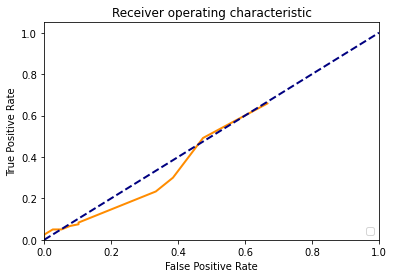

In [113]:
# Just to visualize

plt.figure()
lw = 2 # linewidt
plt.plot(
    all_fpr,
    all_tpr,
    color="darkorange",
    lw=lw,
    #label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [114]:
# Find the best fpr/tpr pair

# What is the min euclidian distance in the dataframe?
conf_matrices_data[['Euclidian']].idxmin()

Euclidian    2
dtype: int64

In [115]:
conf_matrices_data.loc[2]

threshold    53.000000
Euclidian     0.695284
FPR           0.474359
TPR           0.491667
TP           59.000000
TN           41.000000
FP           37.000000
FN           61.000000
Name: 2, dtype: float64